<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ensayo de optimizadores

Utilizar y comparar diferentes optimizadores<br>

v1.1

In [3]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [1]:
from keras.datasets import mnist

# Leer el dataset de mnist
(data_X_train, data_y_train), (data_X_test, data_y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### `MNIST dataset`:
El dataset **`MNIST`** contiene 70.000 imagenes de números escritos a mano (números del 0 al 9, 10 dígitos). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el dígito que representa la imagen en cuestión, un número de 0 al 9


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [4]:
# Normalizamos los datos para que se encuentren entre 0 y 1
X_train_norm = data_X_train / 255
X_test_norm = data_X_test / 255

In [5]:
print('Cantidad de datos en observacion:', X_train_norm.shape[0])

Cantidad de datos en observacion: 60000


In [6]:
print('Tamaño de la imagen:', X_train_norm[0].shape)

Tamaño de la imagen: (28, 28)


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

#### Transformar los imagenes de 28x28 (2 dimensiones) en un array de una dimensión (28x28 = 784)
Esto se realiza porque las redes neuronales no soportan que se ingrese un array de dos dimensiones, solo soportan ingresar "N" features (un array)

In [7]:
# proceso de flatten --> transformar las imagenes en un vector de 1 dimension

num_pixels = X_train_norm.shape[1] * X_train_norm.shape[2]

X_train = X_train_norm.reshape(X_train_norm.shape[0], num_pixels).astype('float32')
X_test = X_test_norm.reshape(X_test_norm.shape[0], num_pixels).astype('float32')

In [8]:
print('Datos en observacion:', X_train.shape)

Datos en observacion: (60000, 784)


Son 60000 vectores, cada vector representa lo mismo que una fila de un dataset. Cada fila o vector tiene 784 columnas

In [9]:
print('Dimensión de cada imagen faltten:', X_train[0].shape)

Dimensión de cada imagen faltten: (784,)


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [10]:
# Transformar la salida a oneHotEncoding con to_categorical
y_train = to_categorical(data_y_train)
y_test = to_categorical(data_y_test)

In [11]:
# input shape
in_shape = X_train.shape[1]
in_shape

784

In [12]:
# output shape
out_shape = y_train.shape[1]
out_shape

10

In [18]:
from keras.layers import Dense

def crear_modelo(optimizador):

    model = Sequential()

    model.add(Dense(units=128, activation='sigmoid', input_shape=(in_shape,)))
    model.add(Dense(units=out_shape, activation='softmax'))

    model.compile(optimizer=optimizador,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return model

In [19]:
optimizadores = [
    'sgd',
    'rmsprop',
    'adadelta',
    'adam',
    'adamax',
    'nadam'
]

histories = []

for optimizador in optimizadores:
    model = crear_modelo(optimizador)
    history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128, verbose=0)
    histories.append(history)

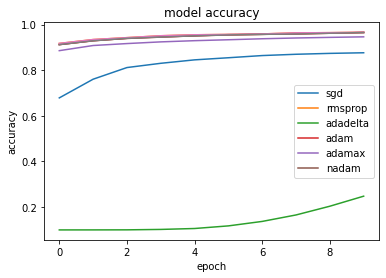

In [25]:
# Dibujar los resultados con cada optimizador
for optimizador, history in zip(optimizadores, histories):
    plt.plot(history.history['val_accuracy'])
    
plt.plot(histories[1].history['val_accuracy'])
plt.plot(histories[3].history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(optimizadores, loc='best')
plt.show()

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

Los mejores optimizadores para utilizar son los derivados de Adam y RMSprop

Referencia: https://keras.io/api/optimizers/